In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# EDA 

load the file `breast_cancer_wisconsin.csv` into a pandas DataFrame.

[Read the description of the dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29)

Use pandas to do some exploratory data analysis to understand the data. 

Think about questions like: 
    - How many observations? 
    - How many features? 
    - What kind of features? What do they mean?
    - Are all the features important for classification?
    - Is there any connection between the features?

In [2]:
df = pd.read_csv('data/breast_cancer_wisconsin.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

Cleaning the data:

- Remove rows `id` and `Unnamed: 32`

In [4]:
df.drop(['Unnamed: 32', 'id'], axis=1, inplace=True)

- Use the map method to change the values in the `diagnosis` column as follows: Change `B` to `0` and `M` to `1`.

In [5]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [6]:
df['diagnosis'] = df['diagnosis'].map({'M':1, 'B':0})

In [7]:
df.diagnosis.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

Data subsetting:

- Create 4 new DataFrames:
    - mean_df for the features ending in 'mean'
    - se_df for the features ending in 'se' 
    - worst_df for the features ending in 'worst'
    - naive_df containing only 'area_mean' and 'texture_mean'. 
    
- Each of the DataFrames above should also include the `diagnosis` column.

In [8]:
mean_features = [feature for feature in df.columns if feature[-4:]=='mean']
se_features = [feature for feature in df.columns if feature[-2:]=='se']
worst_features = [feature for feature in df.columns if feature[-5:]=='worst']
naive_features = ['area_mean', 'texture_mean']

In [9]:
mean_features.append('diagnosis')
se_features.append('diagnosis')
worst_features.append('diagnosis')
naive_features.append('diagnosis')

In [10]:
mean_df = df[mean_features]
se_df = df[se_features]
worst_df = df[worst_features]
naive_df = df[naive_features]

Visualization:
- Create a pair plot of each dataframe, color-separated by diagnosis.
- Can you recognize any clear patterns? What could they mean?

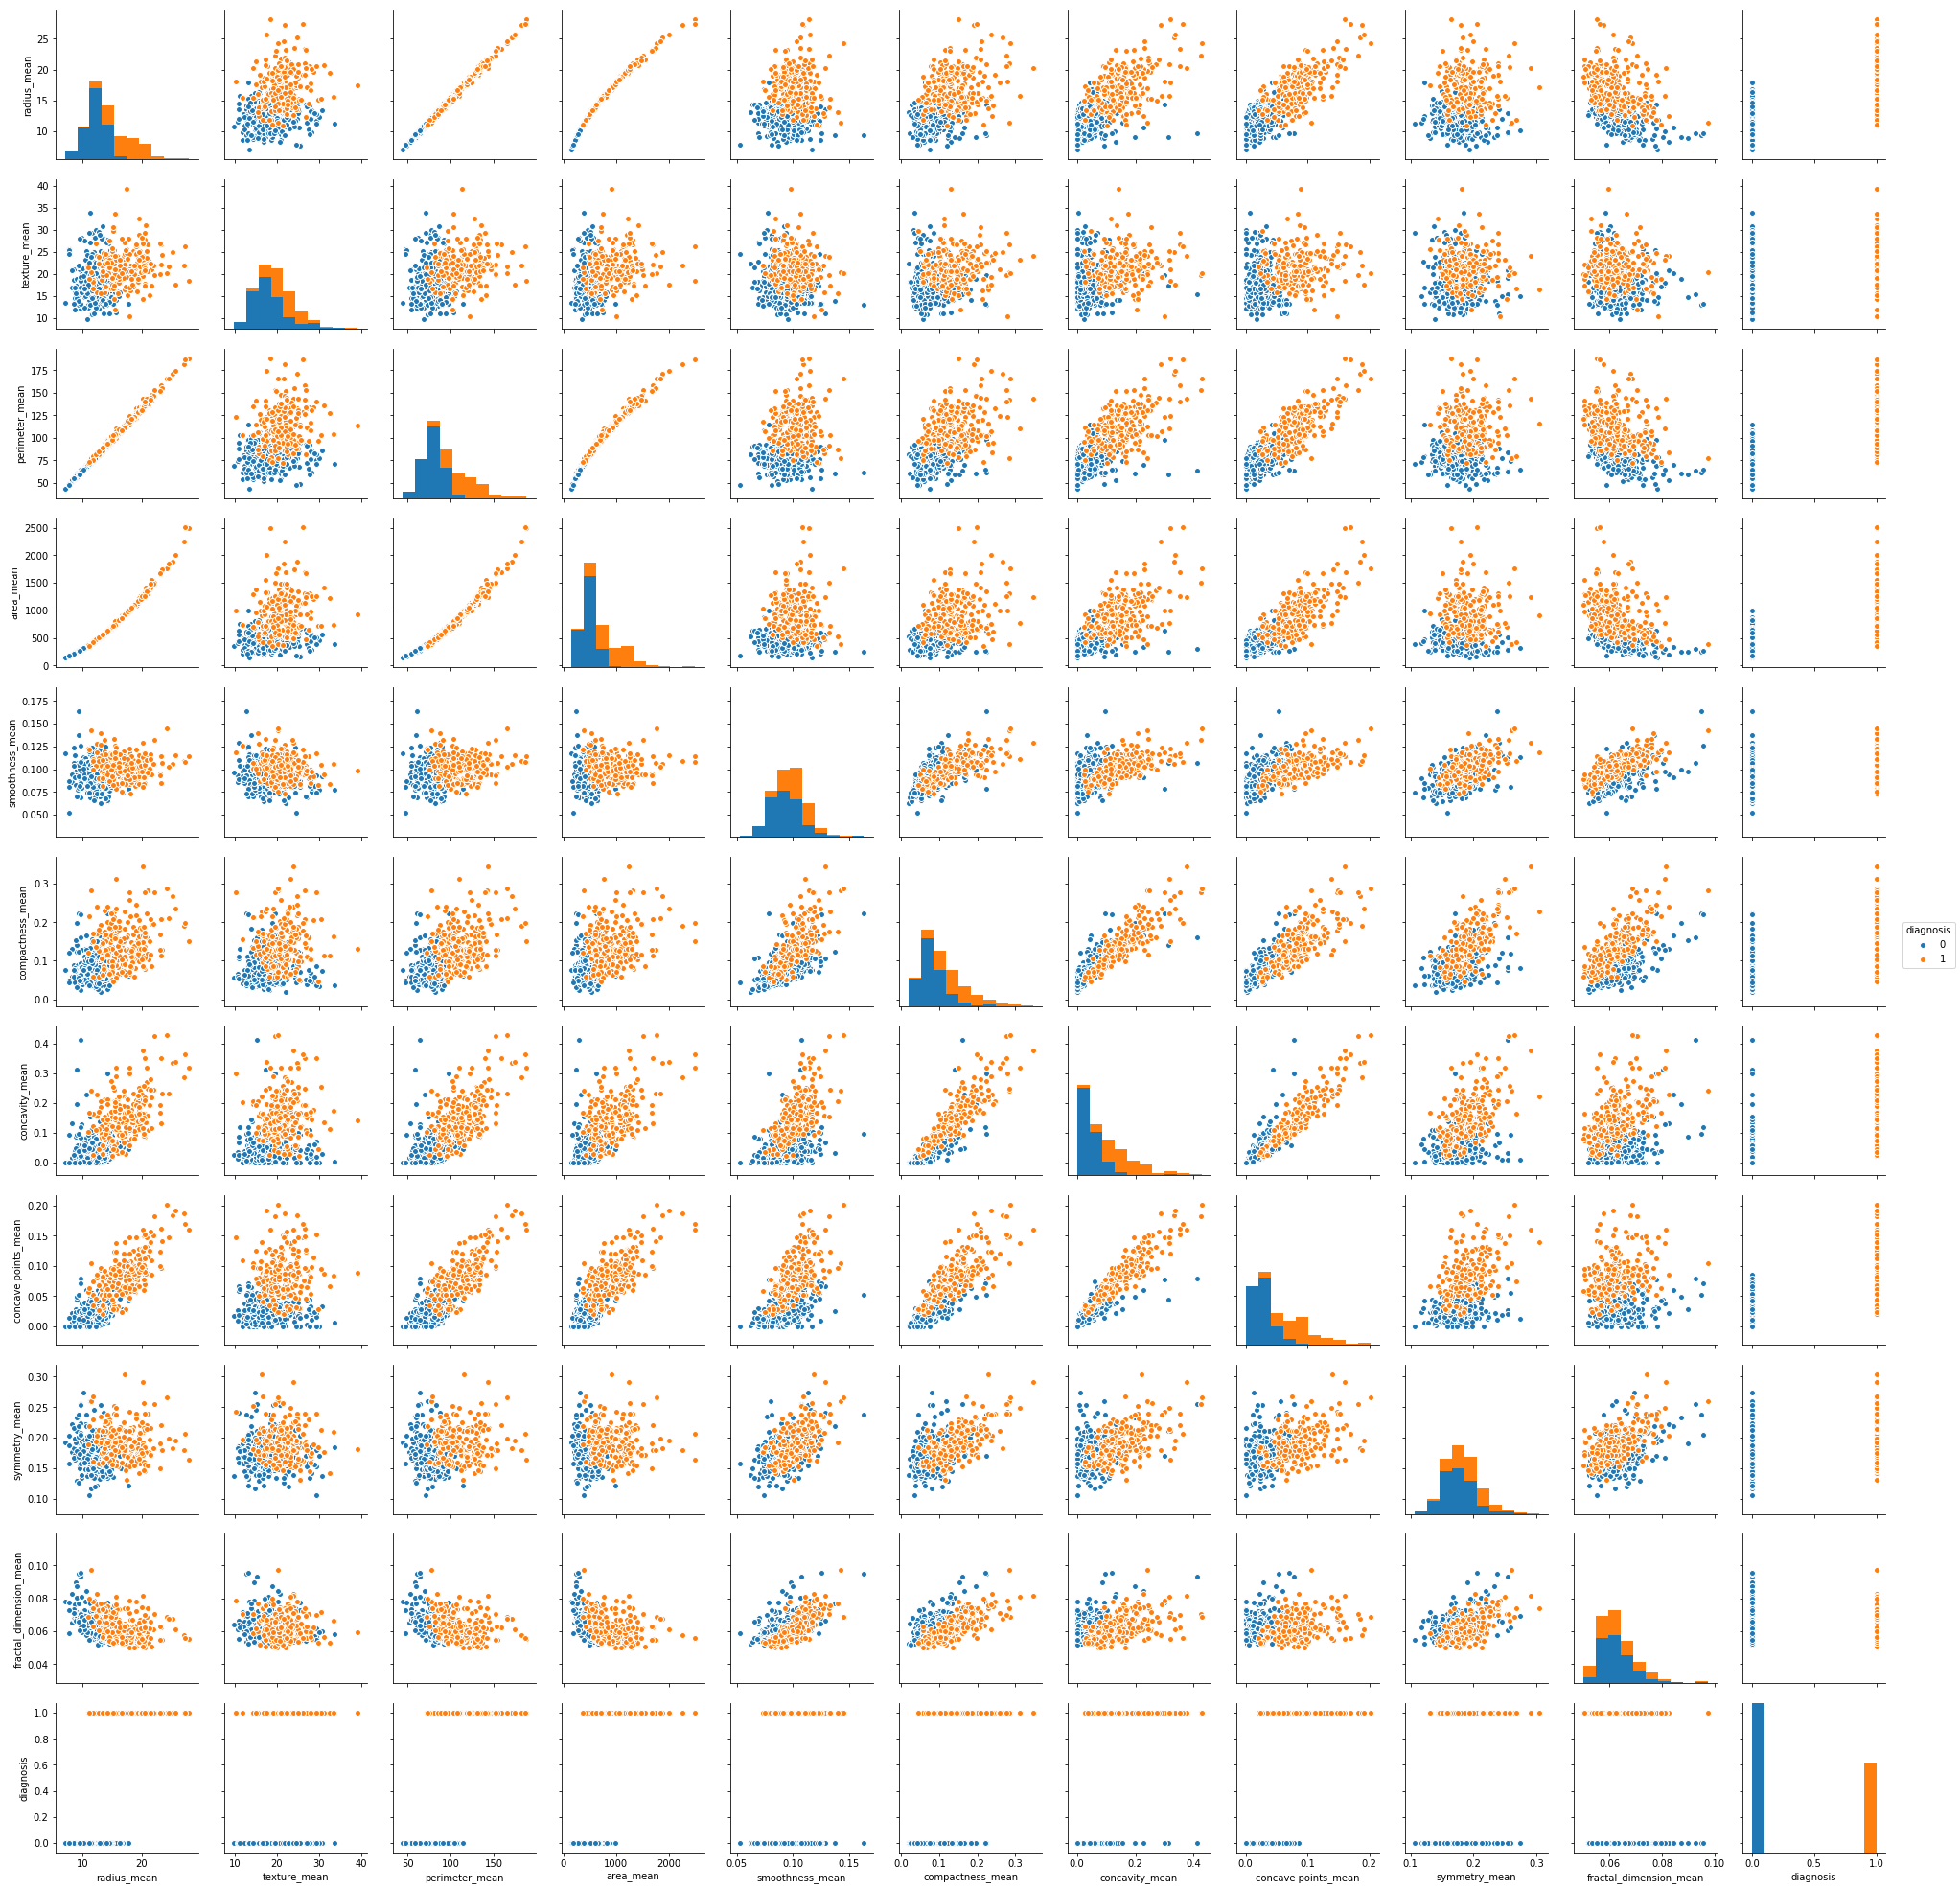

In [11]:
sns.pairplot(data=mean_df, hue='diagnosis')

Scaling
1. Take a look at the summary statistics of the `mean_df` dataframe.
2. Use StandardScaler from sklearn to scale the features (don't scale the diagnosis column)
3. Take a look at the summary statistics of the scales means. Does the result make sense?

In [12]:
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()
X = mean_df.drop('diagnosis', axis=1)
y = mean_df['diagnosis']

In [13]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.98100,11.70000,13.37000,15.78000,28.11000
texture_mean,569.0,19.289649,4.301036,9.71000,16.17000,18.84000,21.80000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.79000,75.17000,86.24000,104.10000,188.50000
area_mean,569.0,654.889104,351.914129,143.50000,420.30000,551.10000,782.70000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.05263,0.08637,0.09587,0.10530,0.16340
compactness_mean,569.0,0.104341,0.052813,0.01938,0.06492,0.09263,0.13040,0.34540
concavity_mean,569.0,0.088799,0.079720,0.00000,0.02956,0.06154,0.13070,0.42680
concave points_mean,569.0,0.048919,0.038803,0.00000,0.02031,0.03350,0.07400,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.10600,0.16190,0.17920,0.19570,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.04996,0.05770,0.06154,0.06612,0.09744


In [14]:
X_scaled = pd.DataFrame(scl.fit_transform(X), columns = X.columns)
X_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,-1.373633e-16,1.00088,-2.029648,-0.689385,-0.215082,0.469393,3.971288
texture_mean,569.0,6.868164e-17,1.00088,-2.229249,-0.725963,-0.104636,0.584176,4.651889
perimeter_mean,569.0,-1.248757e-16,1.00088,-1.984504,-0.691956,-0.235980,0.499677,3.976130
area_mean,569.0,-2.185325e-16,1.00088,-1.454443,-0.667195,-0.295187,0.363507,5.250529
smoothness_mean,569.0,1.748260e-16,1.00088,-3.112085,-0.710963,-0.034891,0.636199,4.770911
compactness_mean,569.0,1.998011e-16,1.00088,-1.610136,-0.747086,-0.221940,0.493857,4.568425
concavity_mean,569.0,3.746271e-17,1.00088,-1.114873,-0.743748,-0.342240,0.526062,4.243589
concave points_mean,569.0,-3.746271e-17,1.00088,-1.261820,-0.737944,-0.397721,0.646935,3.927930
symmetry_mean,569.0,1.873136e-16,1.00088,-2.744117,-0.703240,-0.071627,0.530779,4.484751
fractal_dimension_mean,569.0,4.526744e-16,1.00088,-1.819865,-0.722639,-0.178279,0.470983,4.910919


### Classification

Train a LogisticRegression model using the `naive_df` dataframe and show the model score.
(Don't forget to do a train-test-split first)

In [15]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression

In [16]:
X = naive_df.drop('diagnosis', axis=1)
y = naive_df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
clf = LogisticRegression()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8947368421052632

Take a deeper look at the results with `classification_report` and `confusion_matrix` from sklearn

In [17]:
from sklearn.metrics import classification_report, confusion_matrix

In [18]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.86      1.00      0.92        73
          1       1.00      0.71      0.83        41

avg / total       0.91      0.89      0.89       114



In [19]:
cm = confusion_matrix(y_test, y_pred)

In [20]:
cm

array([[73,  0],
       [12, 29]])

In [21]:
cm/cm.sum(axis=1)

array([[1.        , 0.        ],
       [0.16438356, 0.70731707]])

- Define a function `report(df, clf)` that receives a dataframe `df` and a classifier `clf`, prints out the stratified 5-fold cross-validation scores and the mean cross-validation scores, and returns the mean cross-validation score.

In [22]:
def report(df, clf, test_size=0.2, random_state=123, score_only=False):
    X = df.drop('diagnosis', axis=1)
    y = df['diagnosis']
    cv = StratifiedKFold(n_splits=5)
    cvs = cross_val_score(clf, X, y, cv=cv)
    print('Cross validation score: ', cvs)
    print('mean: ',  cvs.mean())
    
    #The next part was not required in the task - trains a model and prints a classification report
    if not score_only:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print('\nClassification report:')
        print(classification_report(y_test, y_pred))
    
    return(cvs.mean())

#### Which dataframe is most predictive?
- Call `report()` with `clf = LogisticRegression()` on each of the 5 (non-scaled) dataframes you have (including the entire dataset). What result do you expect? Were you right?
- Read about the make_pipeline function and figure out how to include StandardScaler into your cross-validation. Add a boolean `scale` parameter to the `report` function to include this functionality.
- Run the `report` on all datasets again, this time with `scale=True`. Did the results change?

In [23]:
names = ['df', 'mean_df', 'se_df', 'worst_df', 'naive_df']
for i, df in enumerate([df, mean_df, se_df, worst_df, naive_df]):
    print(names[i], ':')
    report(df, clf = LogisticRegression(), score_only=True)
    print()

df :
Cross validation score:  [0.93043478 0.93913043 0.97345133 0.94690265 0.96460177]
mean:  0.9509041939207385

mean_df :
Cross validation score:  [0.86956522 0.88695652 0.90265487 0.9380531  0.92035398]
mean:  0.903516737206618

se_df :
Cross validation score:  [0.84347826 0.87826087 0.89380531 0.9380531  0.89380531]
mean:  0.8894805694497885

worst_df :
Cross validation score:  [0.92173913 0.93043478 0.98230088 0.9380531  0.97345133]
mean:  0.9491958445555984

naive_df :
Cross validation score:  [0.83478261 0.86956522 0.89380531 0.94690265 0.91150442]
mean:  0.8913120430934974



In [24]:
from sklearn.pipeline import make_pipeline

In [25]:
def report(df, clf, test_size=0.2, random_state=123, score_only=False, scale=False):
    X = df.drop('diagnosis', axis=1)
    y = df['diagnosis']
    cv = StratifiedKFold(n_splits=5)
    if scale:
        pipeline = make_pipeline(StandardScaler(), clf)
        clf = pipeline
    cvs = cross_val_score(clf, X, y, cv=cv)
    print('Cross validation score: ', cvs)
    print('mean: ',  cvs.mean())
    
    if not score_only:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print('\nClassification report:')
        print(classification_report(y_test, y_pred))
    return(cvs.mean())

In [26]:
names = ['df', 'mean_df', 'se_df', 'worst_df', 'naive_df']
for i, df in enumerate([df, mean_df, se_df, worst_df, naive_df]):
    print(names[i], ':')
    report(df, clf = LogisticRegression(), score_only=True, scale=True)
    print()

df :
Cross validation score:  [0.84347826 0.88695652 0.87610619 0.92035398 0.89380531]
mean:  0.8841400538668719

mean_df :
Cross validation score:  [0.89565217 0.94782609 0.95575221 0.94690265 0.92920354]
mean:  0.9350673335898423

se_df :
Cross validation score:  [0.8        0.86086957 0.87610619 0.92920354 0.86725664]
mean:  0.8666871873797615

worst_df :
Cross validation score:  [0.97391304 0.96521739 0.99115044 0.97345133 0.98230088]
mean:  0.9772066179299731

naive_df :
Cross validation score:  [0.84347826 0.88695652 0.87610619 0.92035398 0.89380531]
mean:  0.8841400538668719



**Bonus**:
Read the [classifier comparison documentation from sklearn](http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py).

Based on the code in the documentation, compare the same classifiers on your various dataframes to find an optimal classification. Some classifiers may take a while to train, so have patience.

# Various classifiers:

In [27]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [28]:
classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

In [29]:
clf_names = [
    "Logistic Regression",
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA"]

In [30]:
scores = []
for name, clf in zip(clf_names, classifiers):
    print(name)
    scores.append(report(df, clf=clf, score_only=True, scale=True))
    print()

Logistic Regression
Cross validation score:  [0.84347826 0.88695652 0.87610619 0.92035398 0.89380531]
mean:  0.8841400538668719

Nearest Neighbors
Cross validation score:  [0.8173913  0.86086957 0.89380531 0.92035398 0.88495575]
mean:  0.875475182762601

Linear SVM
Cross validation score:  [0.83478261 0.82608696 0.88495575 0.92035398 0.90265487]
mean:  0.8737668333974605

RBF SVM
Cross validation score:  [0.85217391 0.86956522 0.92920354 0.92920354 0.89380531]
mean:  0.8947903039630626

Gaussian Process
Cross validation score:  [0.85217391 0.88695652 0.90265487 0.92920354 0.90265487]
mean:  0.8947287418237784

Decision Tree
Cross validation score:  [0.83478261 0.86086957 0.91150442 0.92035398 0.90265487]
mean:  0.8860330896498653

Random Forest
Cross validation score:  [0.85217391 0.88695652 0.90265487 0.9380531  0.89380531]
mean:  0.8947287418237784

Neural Net
Cross validation score:  [0.85217391 0.88695652 0.89380531 0.92920354 0.92035398]
mean:  0.8964986533282031

AdaBoost
Cross v

In [31]:
scores = np.array(scores)

In [32]:
clf_names[scores.argmax()]

'Neural Net'

In [33]:
report(df=df, clf=make_pipeline(StandardScaler(), classifiers[scores.argmax()]))

Cross validation score:  [0.84347826 0.88695652 0.90265487 0.92920354 0.92035398]
mean:  0.8965294343978453

Classification report:
             precision    recall  f1-score   support

          0       0.89      1.00      0.94        73
          1       1.00      0.78      0.88        41

avg / total       0.93      0.92      0.92       114



0.8965294343978453

## All dfs, all clfs:

In [34]:
df_names = ['df', 'mean_df', 'se_df', 'worst_df', 'naive_df']

In [35]:
scores_matrix = np.zeros((len(df_names), len(clf_names)))

In [36]:
for i, df in enumerate([df, mean_df, se_df, worst_df, naive_df]):
    for j, (name, clf) in enumerate(zip(clf_names, classifiers)):
        print(df_names[i], name)
        scores_matrix[i, j] = report(df, clf=clf, score_only=True, scale=True)

df Logistic Regression
Cross validation score:  [0.84347826 0.88695652 0.87610619 0.92035398 0.89380531]
mean:  0.8841400538668719
df Nearest Neighbors
Cross validation score:  [0.8173913  0.86086957 0.89380531 0.92035398 0.88495575]
mean:  0.875475182762601
df Linear SVM
Cross validation score:  [0.83478261 0.82608696 0.88495575 0.92035398 0.90265487]
mean:  0.8737668333974605
df RBF SVM
Cross validation score:  [0.85217391 0.86956522 0.92920354 0.92920354 0.89380531]
mean:  0.8947903039630626
df Gaussian Process
Cross validation score:  [0.85217391 0.88695652 0.90265487 0.92920354 0.90265487]
mean:  0.8947287418237784
df Decision Tree
Cross validation score:  [0.83478261 0.86086957 0.91150442 0.92035398 0.90265487]
mean:  0.8860330896498653
df Random Forest
Cross validation score:  [0.84347826 0.89565217 0.9380531  0.90265487 0.89380531]
mean:  0.8947287418237785
df Neural Net
Cross validation score:  [0.86956522 0.88695652 0.89380531 0.92920354 0.90265487]
mean:  0.8964370911889187


C:\Program Files\Anaconda3\envs\Radical_1\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
C:\Program Files\Anaconda3\envs\Radical_1\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
C:\Program Files\Anaconda3\envs\Radical_1\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


Cross validation score:  [0.89565217 0.95652174 0.95575221 0.96460177 0.94690265]
mean:  0.943886110042324
mean_df AdaBoost
Cross validation score:  [0.92173913 0.94782609 0.92035398 0.95575221 0.94690265]
mean:  0.9385148133897653
mean_df Naive Bayes
Cross validation score:  [0.86086957 0.92173913 0.91150442 0.95575221 0.92035398]
mean:  0.91404386302424
mean_df QDA
Cross validation score:  [0.88695652 0.92173913 0.9380531  0.96460177 0.94690265]
mean:  0.9316506348595613
se_df Logistic Regression
Cross validation score:  [0.8        0.86086957 0.87610619 0.92920354 0.86725664]
mean:  0.8666871873797615
se_df Nearest Neighbors
Cross validation score:  [0.82608696 0.8173913  0.81415929 0.81415929 0.84070796]
mean:  0.8225009619084263
se_df Linear SVM
Cross validation score:  [0.80869565 0.8173913  0.83185841 0.86725664 0.84955752]
mean:  0.8349519045786842
se_df RBF SVM
Cross validation score:  [0.71304348 0.74782609 0.76106195 0.76106195 0.72566372]
mean:  0.741731435167372
se_df Gaus

C:\Program Files\Anaconda3\envs\Radical_1\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
C:\Program Files\Anaconda3\envs\Radical_1\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
C:\Program Files\Anaconda3\envs\Radical_1\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


Cross validation score:  [0.97391304 0.96521739 0.98230088 0.97345133 0.98230088]
mean:  0.9754367064255483
worst_df AdaBoost
Cross validation score:  [0.92173913 0.95652174 0.95575221 0.96460177 0.94690265]
mean:  0.9491035013466718
worst_df Naive Bayes
Cross validation score:  [0.92173913 0.93043478 0.99115044 0.9380531  0.9380531 ]
mean:  0.943886110042324
worst_df QDA
Cross validation score:  [0.94782609 0.92173913 0.99115044 0.94690265 0.96460177]
mean:  0.9544440169295882
naive_df Logistic Regression
Cross validation score:  [0.84347826 0.88695652 0.87610619 0.92035398 0.89380531]
mean:  0.8841400538668719
naive_df Nearest Neighbors
Cross validation score:  [0.8173913  0.86086957 0.89380531 0.92035398 0.88495575]
mean:  0.875475182762601
naive_df Linear SVM
Cross validation score:  [0.83478261 0.82608696 0.88495575 0.92035398 0.90265487]
mean:  0.8737668333974605
naive_df RBF SVM
Cross validation score:  [0.85217391 0.86956522 0.92920354 0.92920354 0.89380531]
mean:  0.8947903039

In [37]:
scores_matrix

array([[0.88414005, 0.87547518, 0.87376683, 0.8947903 , 0.89472874,
        0.88603309, 0.89472874, 0.89643709, 0.87712197, 0.87007311,
        0.87715275],
       [0.93506733, 0.93500577, 0.9386995 , 0.82933436, 0.94730281,
        0.9227703 , 0.92978838, 0.94388611, 0.93851481, 0.91404386,
        0.93165063],
       [0.86668719, 0.82250096, 0.8349519 , 0.74173144, 0.88237014,
        0.86299346, 0.86482493, 0.86134667, 0.87532128, 0.83498269,
        0.87361293],
       [0.97720662, 0.96490958, 0.96484802, 0.92615621, 0.97366679,
        0.93851481, 0.95602924, 0.97543671, 0.9491035 , 0.94388611,
        0.95444402],
       [0.88414005, 0.87547518, 0.87376683, 0.8947903 , 0.89472874,
        0.887803  , 0.89652943, 0.89649865, 0.87712197, 0.87007311,
        0.87715275]])

([<matplotlib.axis.XTick at 0x1d6f19f70f0>,
 <a list of 5 Text xticklabel objects>)

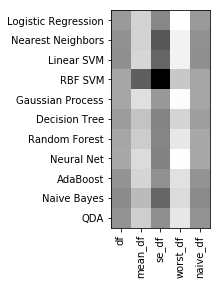

In [38]:
plt.imshow(scores_matrix.T, cmap='gray')
plt.yticks(np.arange(len(clf_names)), clf_names)
plt.xticks(np.arange(len(df_names)), df_names, rotation=90)

In [39]:
ix = np.unravel_index(np.argmax(scores_matrix), scores_matrix.shape)

In [40]:
scores_matrix[ix]

0.9772066179299731

In [ ]:
print(df_names[ix[0]])
print(clf_names[ix[1]])

worst_df
Logistic Regression


without scaling:

In [ ]:
for i, df in enumerate([df, mean_df, se_df, worst_df, naive_df]):
    for j, (name, clf) in enumerate(zip(clf_names, classifiers)):
        print(df_names[i], name)
        scores_matrix[i, j] = report(df, clf=clf, score_only=True, scale=False)

df Logistic Regression
Cross validation score:  [0.83478261 0.86956522 0.89380531 0.94690265 0.91150442]
mean:  0.8913120430934974
df Nearest Neighbors
Cross validation score:  [0.84347826 0.87826087 0.88495575 0.91150442 0.85840708]
mean:  0.8753212774143903
df Linear SVM
Cross validation score:  [0.84347826 0.86956522 0.88495575 0.92035398 0.89380531]
mean:  0.8824317045017315
df RBF SVM
Cross validation score:  [0.62608696 0.63478261 0.63716814 0.62831858 0.62831858]
mean:  0.6309349749903809
df Gaussian Process
Cross validation score:  [0.85217391 0.86956522 0.88495575 0.9380531  0.89380531]
mean:  0.8877106579453636
df Decision Tree
Cross validation score:  [0.83478261 0.86086957 0.91150442 0.92035398 0.90265487]
mean:  0.8860330896498653
df Random Forest
Cross validation score:  [0.84347826 0.87826087 0.89380531 0.95575221 0.90265487]
mean:  0.8947903039630628
df Neural Net
Cross validation score:  [0.65217391 0.33913043 0.7699115  0.42477876 0.80530973]
mean:  0.5982608695652175

C:\Program Files\Anaconda3\envs\Radical_1\lib\site-packages\sklearn\gaussian_process\gpc.py:429: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'funcalls': 79, 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'warnflag': 2, 'grad': array([-0.96347403,  1.05306271]), 'nit': 10}
  " state: %s" % convergence_dict)


Cross validation score:  [0.86086957 0.88695652 0.91150442 0.92035398 0.91150442]
mean:  0.8982377837629858
mean_df Decision Tree
Cross validation score:  [0.87826087 0.90434783 0.91150442 0.94690265 0.9380531 ]
mean:  0.9158137745286649
mean_df Random Forest
Cross validation score:  [0.90434783 0.94782609 0.94690265 0.95575221 0.89380531]
mean:  0.9297268180069258
mean_df Neural Net
Cross validation score:  [0.7826087  0.65217391 0.84070796 0.88495575 0.87610619]
mean:  0.8073105040400155
mean_df AdaBoost
Cross validation score:  [0.92173913 0.94782609 0.92035398 0.95575221 0.94690265]
mean:  0.9385148133897653
mean_df Naive Bayes
Cross validation score:  [0.86956522 0.92173913 0.91150442 0.94690265 0.92035398]
mean:  0.9140130819545979
mean_df QDA
Cross validation score:  [0.88695652 0.92173913 0.9380531  0.96460177 0.94690265]
mean:  0.9316506348595613
se_df Logistic Regression
Cross validation score:  [0.84347826 0.87826087 0.89380531 0.9380531  0.89380531]
mean:  0.889480569449788

In [ ]:
ix = np.unravel_index(np.argmax(scores_matrix), scores_matrix.shape)

In [ ]:
scores_matrix[ix]

In [ ]:
print(df_names[ix[0]])
print(clf_names[ix[1]])